# **Hands On Implementation of Perceptron with Python.ipynb**

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd
plt.style.use("fivethirtyeight")

In [56]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs

  def activationFunction(self, inputs, weights):
    z = np.dot(inputs, weights)
    return np.where(z > 0 , 1, 0)

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
    print(f"X_with_bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)

## **AND Operation:**

In [57]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [58]:
X = AND.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [59]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [60]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [1.61999576e-05 1.52381727e-04 8.67951880e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 1 0 1]
error: 
0    0
1   -1
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.61999576e-05 -4.99847618e-01  5.00086795e-01]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[5.00016200e-01 1.52381727e-04 8.67951880e-05]
#############

for epoch: 2
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[ 1.61999576e-05 -4.99847618e-01  1.00008680e+00]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[5.00016200e-01 1.52381727e-04 5.00086795e-01]
#############

for epoch: 4
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[5.00016200e-01 1.5238172

In [61]:
model.predict(X)

array([0, 0, 0, 1])

In [62]:
model.weights

array([5.00016200e-01, 1.52381727e-04, 5.00086795e-01])

In [63]:
import os

# saving model
dir_ = "Perceptron_model"
os.makedirs(dir_, exist_ok=True)
filename = os.path.join(dir_, 'AND_model.model')
joblib.dump(model, filename)

['Perceptron_model/AND_model.model']

In [64]:
# load the model from drive
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

[0 0 0 1]


## **Saving and Loading model**

In [65]:
import os

# saving model
dir_ = "Perceptron_model"
os.makedirs(dir_, exist_ok=True)
filename = os.path.join(dir_, 'AND_model.model')
joblib.dump(model, filename)

['Perceptron_model/AND_model.model']

In [66]:
# load the model from drive
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

[0 0 0 1]


---
## **OR Operation:**

In [67]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [68]:
X = OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [69]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [70]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [1.85902482e-06 4.67771971e-05 1.06056834e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 1 0 1]
error: 
0    0
1    0
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 5.00001859e-01  4.67771971e-05 -4.99989394e-01]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[5.00001859e-01 4.67771971e-05 1.06056834e-05]
#############

for epoch: 2
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[5.00001859e-01 4.67771971e-05 1.06056834e-05]
#############

for epoch: 3
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[5.00001859e-01 4.67771971e-05 1.06056834e-05]
#############

for epoch: 4
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[5.00001859e-01 4.67771971e-

---
## **XOR Operation:**

In [71]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [72]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [73]:
model = Perceptron(eta = 0.5, epochs=50)
model.fit(X,y)

self.weights: [-5.64322822e-05  1.21274308e-04  7.57133728e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 1 0 0]
error: 
0    0
1    0
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99943568e-01  1.21274308e-04 -4.99924287e-01]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-5.64322822e-05 -4.99878726e-01  5.00075713e-01]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99943568e-01  1.21274308e-04 -4.99924287e-01]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-5.64322822e-05 -4.99878726e-01  5.00075713e-01]
#############

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99943568e-01

## **Conclusion:**
Here we can see Perceptron can only classify the linear problem like AND, OR operation because they were linear problem. But in the case of XOR it couldn't classify correctly because it was a non-linear problem. Lets see graphically.

## **Analysis with the graph**

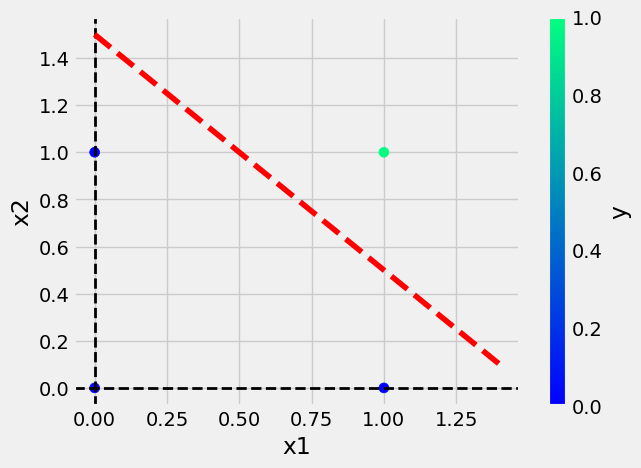

In [74]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)

x = np.linspace(0, 1.4) # >>> 50
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50

plt.plot(x, y, "r--")

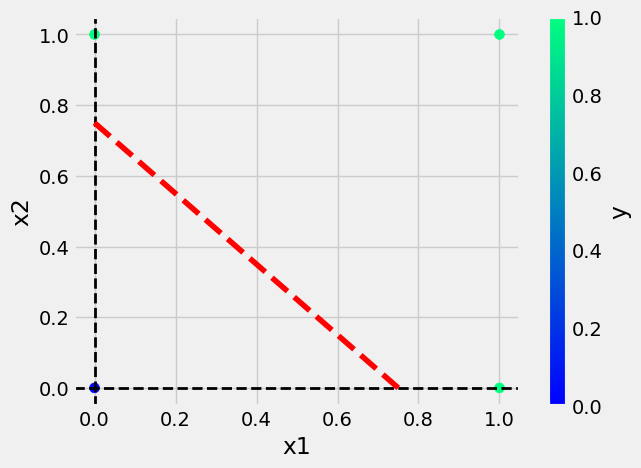

In [75]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y = 0, color ="black", linestyle ="--", linewidth=2)
plt.axvline(x = 0, color ="black", linestyle ="--", linewidth=2)
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'r--');

<Axes: xlabel='x1', ylabel='x2'>

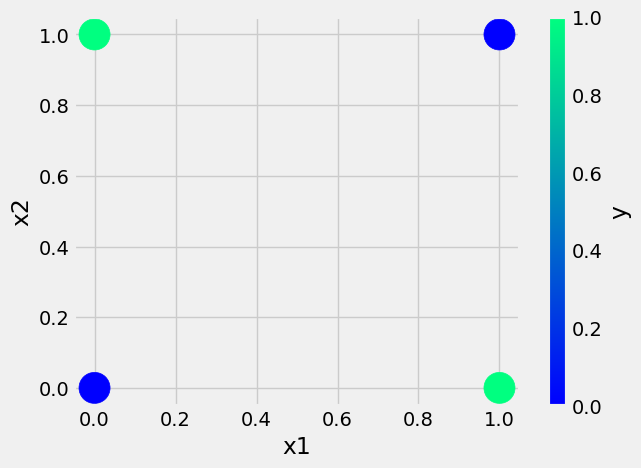

In [76]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=500, cmap="winter")